In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For stationarity tests (Augmented Dickey-Fuller)
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Make plots appear inline if using a Jupyter notebook
%matplotlib inline

In [2]:
try:
  import pingouin as pg
except:
  !pip install pingouin
  import pingouin as pg

In [3]:
df_raw = pd.read_csv('collected_data.csv', parse_dates=True, index_col=0)

print("Head of raw DataFrame:")
print(df_raw.head(), "\n")

print("Basic info:")
df_raw.info()
print()

print("Summary statistics:")
print(df_raw.describe())

Head of raw DataFrame:
                  SP500  GS10  FEDFUNDS  Inflation
Date                                              
1998-04-30  1111.750000  5.64      5.45        NaN
1998-05-31  1090.819946  5.65      5.49        NaN
1998-06-30  1133.839966  5.50      5.56        NaN
1998-07-31  1120.670044  5.46      5.54        NaN
1998-08-31   957.280029  5.34      5.55        NaN 

Basic info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 1998-04-30 to 2025-03-31
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SP500      324 non-null    float64
 1   GS10       324 non-null    float64
 2   FEDFUNDS   324 non-null    float64
 3   Inflation  312 non-null    float64
dtypes: float64(4)
memory usage: 12.7 KB

Summary statistics:
             SP500        GS10    FEDFUNDS   Inflation
count   324.000000  324.000000  324.000000  312.000000
mean   2093.934594    3.433642    2.148735    2.574260
std    1276.8231

In [4]:
# 2A. Identify if any rows have missing values
missing_summary = df_raw.isna().sum()
print("Missing value count per column:\n", missing_summary, "\n")

# 2B. Optionally, remove rows with any missing values
# If the dataset is small, you might prefer forward-fill or interpolation instead of dropping.
df_cleaned = df_raw.dropna()

print("Data after dropping rows with missing values. Shape =", df_cleaned.shape)

Missing value count per column:
 SP500         0
GS10          0
FEDFUNDS      0
Inflation    12
dtype: int64 

Data after dropping rows with missing values. Shape = (312, 4)


### Create Stationary or Differenced Variables

In [5]:
df_cleaned['SP500_Returns'] = df_cleaned['SP500'].pct_change() * 100

<ipython-input-5-e441152c318d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['SP500_Returns'] = df_cleaned['SP500'].pct_change() * 100


In [6]:
# 6A. keep the level
df_cleaned['GS10_Level'] = df_cleaned['GS10']          # new column

# 6B. keep the shock variable
df_cleaned['GS10_BpsChange'] = df_cleaned['GS10'].diff()

# 6C. FED‑funds shock (rename for clarity)
df_cleaned['FEDFUNDS_BpsChange'] = df_cleaned['FEDFUNDS'].diff()

<ipython-input-6-2b22b0f9ab38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['GS10_Level'] = df_cleaned['GS10']          # new column
<ipython-input-6-2b22b0f9ab38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['GS10_BpsChange'] = df_cleaned['GS10'].diff()
<ipython-input-6-2b22b0f9ab38>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [7]:
df_cleaned['FEDFUNDS_Level'] = df_cleaned['FEDFUNDS']

<ipython-input-7-37e3514f45f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['FEDFUNDS_Level'] = df_cleaned['FEDFUNDS']


In [8]:
df_cleaned['Inflation_YoY'] = df_cleaned['Inflation']

<ipython-input-8-208cd172f87b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Inflation_YoY'] = df_cleaned['Inflation']


In [9]:
# 2A. Identify if any rows have missing values
missing_summary_cleaned = df_cleaned.isna().sum()
print("Missing value count per column:\n", missing_summary_cleaned, "\n")

Missing value count per column:
 SP500                 0
GS10                  0
FEDFUNDS              0
Inflation             0
SP500_Returns         1
GS10_Level            0
GS10_BpsChange        1
FEDFUNDS_BpsChange    1
FEDFUNDS_Level        0
Inflation_YoY         0
dtype: int64 



In [10]:
# Example: keep only the new/processed columns
keep_cols = ['SP500_Returns',
             'GS10_Level',
             'FEDFUNDS_Level',
             'FEDFUNDS_BpsChange',
             'Inflation_YoY']
df_processed = df_cleaned[keep_cols].dropna()
print("Processed data:")
print(df_processed.head())

Processed data:
            SP500_Returns  GS10_Level  FEDFUNDS_Level  FEDFUNDS_BpsChange  \
Date                                                                        
1999-05-31      -2.497048        5.54            4.74                0.00   
1999-06-30       5.443833        5.90            4.76                0.02   
1999-07-31      -3.204609        5.79            4.99                0.23   
1999-08-31      -0.625409        5.94            5.07                0.08   
1999-09-30      -2.855179        5.92            5.22                0.15   

            Inflation_YoY  
Date                       
1999-05-31       2.091021  
1999-06-30       1.965602  
1999-07-31       2.144608  
1999-08-31       2.264382  
1999-09-30       2.629969  


In [11]:
# df_processed = df_processed.dropna()

In [12]:
missing_summary_processed = df_processed.isna().sum()
print("Missing value count per column:\n", missing_summary_processed, "\n")

Missing value count per column:
 SP500_Returns         0
GS10_Level            0
FEDFUNDS_Level        0
FEDFUNDS_BpsChange    0
Inflation_YoY         0
dtype: int64 



## EDA (Summary Statistics, Correlations)

### Summary Statistics

In [13]:
print("Summary stats for processed variables:")
print(df_processed.describe())

Summary stats for processed variables:
       SP500_Returns  GS10_Level  FEDFUNDS_Level  FEDFUNDS_BpsChange  \
count     311.000000  311.000000      311.000000          311.000000   
mean        0.558728    3.363215        2.024341           -0.001318   
std         4.403950    1.351351        2.061565            0.183457   
min       -16.942452    0.620000        0.050000           -0.960000   
25%        -1.868756    2.225000        0.150000           -0.010000   
50%         1.106065    3.420000        1.260000            0.000000   
75%         3.305471    4.355000        4.050000            0.030000   
max        12.684404    6.660000        6.540000            0.700000   

       Inflation_YoY  
count     311.000000  
mean        2.575203  
std         1.733254  
min        -1.958761  
25%         1.642278  
50%         2.319527  
75%         3.301264  
max         8.999298  


In [14]:
# [code] Partial and Cross-Correlation Analysis
def plot_cross_correlation(series1, series2, max_lag=12, title="Cross-correlation"):
    """
    Plot cross-correlation between two series for lags from -max_lag to max_lag.
    """
    lags = range(-max_lag, max_lag+1)
    corr_values = []
    for lag in lags:
        if lag < 0:
            # Shift series2 backwards by |lag|
            shifted_series2 = series2.shift(-lag)
            corr = series1.corr(shifted_series2)
        elif lag > 0:
            # Shift series1 backwards by lag
            shifted_series1 = series1.shift(lag)
            corr = shifted_series1.corr(series2)
        else:
            corr = series1.corr(series2)
        corr_values.append(corr)

    plt.figure(figsize=(10, 5))
    plt.stem(lags, corr_values)
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.title(title)
    plt.grid(True)
    plt.show()

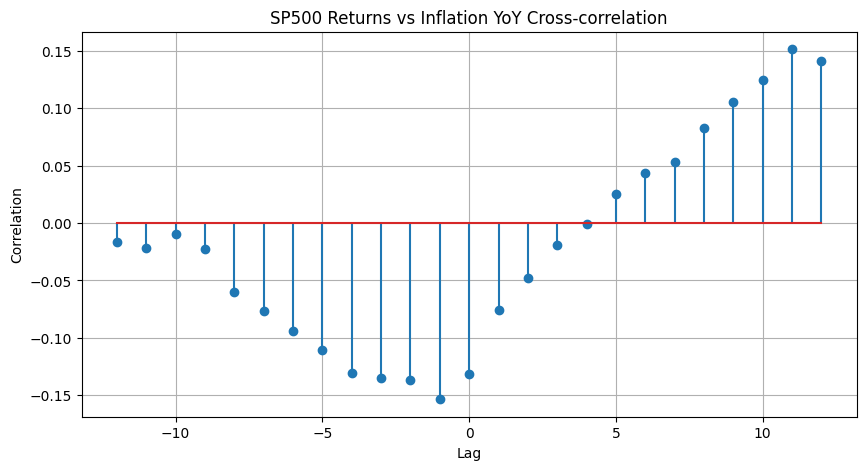

In [15]:
# a maximum lag of 12 (representing one full year) is entirely appropriate. This allows you to observe how the relationship between
# S&P 500 Returns and Inflation YoY evolves over lags up to one year.
# It is a common practice in monthly time series analysis to start with a lag of 12,
# but you can adjust it if you want to explore longer or shorter lag periods.
plot_cross_correlation(df_processed['SP500_Returns'], df_processed['Inflation_YoY'],
                       max_lag=12, title="SP500 Returns vs Inflation YoY Cross-correlation")

In [16]:
partial_corr = pg.partial_corr(data=df_processed, x='SP500_Returns', y='Inflation_YoY', covar='FEDFUNDS_Level')
print("Partial correlation between SP500_Returns and Inflation_YoY (controlling FEDFUNDS_Level):")
print(partial_corr)
print("\n")

Partial correlation between SP500_Returns and Inflation_YoY (controlling FEDFUNDS_Level):
           n         r           CI95%     p-val
pearson  311 -0.121925  [-0.23, -0.01]  0.031869




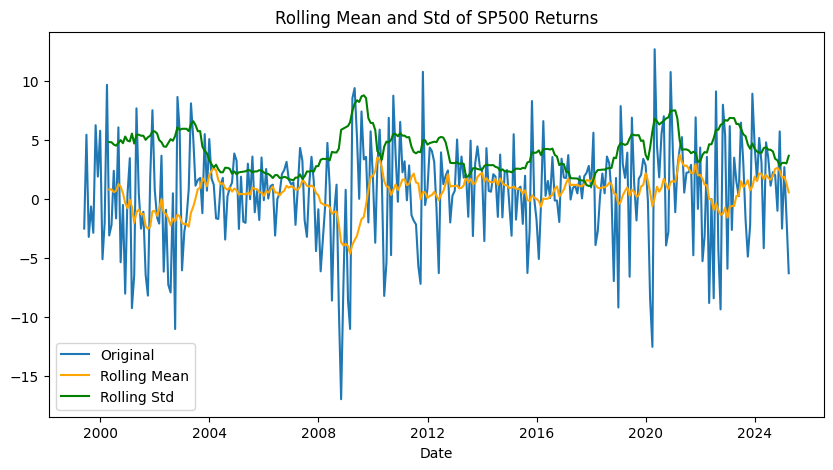

In [17]:
def plot_rolling_statistics(series, window=12, title="Rolling Statistics"):
    """
    Plot the original series along with its rolling mean and rolling standard deviation.
    """
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()

    plt.figure(figsize=(10,5))
    plt.plot(series, label="Original")
    plt.plot(rolling_mean, label="Rolling Mean", color="orange")
    plt.plot(rolling_std, label="Rolling Std", color="green")
    plt.xlabel("Date")
    plt.title(title)
    plt.legend()
    plt.show()

# Example: Rolling statistics for SP500_Returns
plot_rolling_statistics(df_processed['SP500_Returns'], window=12,
                        title="Rolling Mean and Std of SP500 Returns")

### Correlation Matrix

Correlation matrix:
                     SP500_Returns  GS10_Level  FEDFUNDS_Level  \
SP500_Returns            1.000000   -0.106590       -0.050550   
GS10_Level              -0.106590    1.000000        0.771109   
FEDFUNDS_Level          -0.050550    0.771109        1.000000   
FEDFUNDS_BpsChange       0.106623    0.025035        0.035717   
Inflation_YoY           -0.131489    0.188762        0.314640   

                    FEDFUNDS_BpsChange  Inflation_YoY  
SP500_Returns                 0.106623      -0.131489  
GS10_Level                    0.025035       0.188762  
FEDFUNDS_Level                0.035717       0.314640  
FEDFUNDS_BpsChange            1.000000       0.258198  
Inflation_YoY                 0.258198       1.000000  


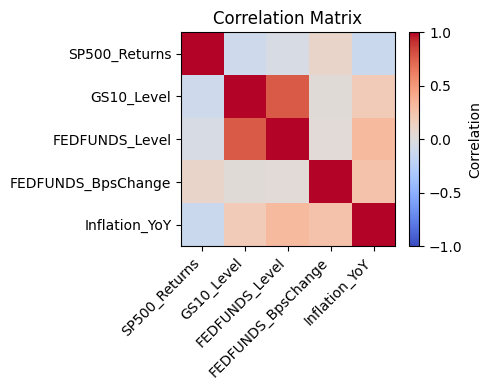

In [18]:
corr_matrix = df_processed.corr()
print("Correlation matrix:\n", corr_matrix)

# Plot the correlation matrix as a heatmap using matplotlib (no seaborn)
plt.figure(figsize=(5, 4))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

### Stationarity Tests

In [19]:
# --------------------------------------------
# ADF stationarity tests  (replace existing cell)
# --------------------------------------------
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    """Augmented Dickey‑Fuller test."""
    print(f'\nAugmented Dickey‑Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['Test Statistic','p‑value','# Lags Used','N Obs']
    out = pd.Series(result[0:4], index=labels)
    for k, v in result[4].items():
        out[f'Critical Value ({k})'] = v
    print(out.to_string())
    print('–' * 40)

tests = [
    ('SP500_Returns',        "S&P 500 Returns"),
    ('GS10_Level',           "10‑year Yield (level)"),
    ('FEDFUNDS_Level',       "Fed‑Funds Rate (level)"),
    ('FEDFUNDS_BpsChange',   "Fed‑Funds Rate Change"),
    ('Inflation_YoY',        "Inflation YoY")
]

for col, title in tests:
    adf_test(df_processed[col], title)


Augmented Dickey‑Fuller Test: S&P 500 Returns
Test Statistic         -1.744727e+01
p‑value                 4.673815e-30
# Lags Used             0.000000e+00
N Obs                   3.100000e+02
Critical Value (1%)    -3.451622e+00
Critical Value (5%)    -2.870909e+00
Critical Value (10%)   -2.571762e+00
––––––––––––––––––––––––––––––––––––––––

Augmented Dickey‑Fuller Test: 10‑year Yield (level)
Test Statistic           -2.025004
p‑value                   0.275719
# Lags Used               2.000000
N Obs                   308.000000
Critical Value (1%)      -3.451761
Critical Value (5%)      -2.870970
Critical Value (10%)     -2.571794
––––––––––––––––––––––––––––––––––––––––

Augmented Dickey‑Fuller Test: Fed‑Funds Rate (level)
Test Statistic           -3.070412
p‑value                   0.028822
# Lags Used               5.000000
N Obs                   305.000000
Critical Value (1%)      -3.451974
Critical Value (5%)      -2.871063
Critical Value (10%)     -2.571844
–––––––––––––––

### Outlier Detection

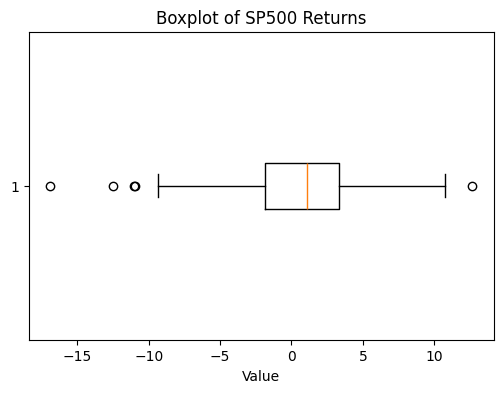

Quantiles for SP500_Returns:
0.01   -10.827765
0.05    -7.953644
0.95     7.465882
0.99     9.644035
Name: SP500_Returns, dtype: float64




In [20]:
# Outlier Detection: Boxplots and Quantile Analysis
def plot_boxplot(series, title="Boxplot for Outlier Detection"):
    """
    Create a boxplot to visually inspect outliers.
    """
    plt.figure(figsize=(6,4))
    plt.boxplot(series.dropna(), vert=False)
    plt.title(title)
    plt.xlabel("Value")
    plt.show()

# Example: Boxplot for SP500_Returns
plot_boxplot(df_processed['SP500_Returns'], title="Boxplot of SP500 Returns")

# You can also examine quantiles if desired:
print("Quantiles for SP500_Returns:")
print(df_processed['SP500_Returns'].quantile([0.01, 0.05, 0.95, 0.99]))
print("\n")

In [21]:
# Seasonality Checks: Seasonal Decomposition
def seasonal_decomp_plot(series, model='additive', period=12, title="Seasonal Decomposition"):
    """
    Decompose the series and plot its seasonal, trend, and residual components.
    """
    result = seasonal_decompose(series.dropna(), model=model, period=period)
    result.plot()
    plt.suptitle(title)
    plt.show()

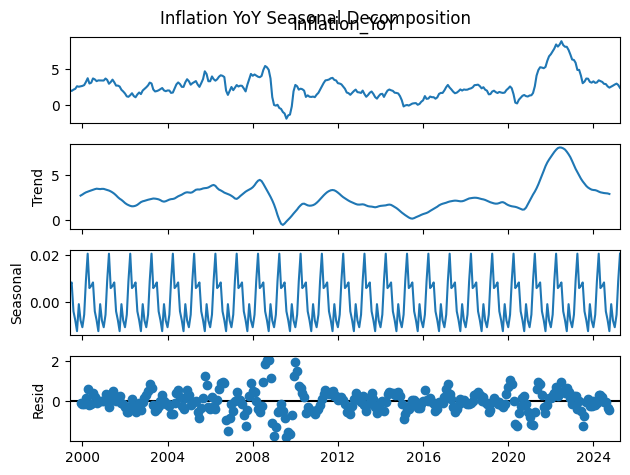

In [22]:
seasonal_decomp_plot(df_processed['Inflation_YoY'], model='additive', period=12,
                     title="Inflation YoY Seasonal Decomposition")

In [23]:
def test_stationarity(series, title="Stationarity Test"):
    """
    Perform the Augmented Dickey-Fuller test and print the results.
    """
    result = adfuller(series.dropna(), autolag='AIC')
    print(f"ADF Test for {title}:")
    print("Test Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    print("\n")

test_stationarity(df_processed['FEDFUNDS_Level'], "Federal Funds Rate (Level)")
test_stationarity(df_processed['Inflation_YoY'], "Inflation YoY")

ADF Test for Federal Funds Rate (Level):
Test Statistic: -3.0704124685616607
p-value: 0.028821703059744096
Critical Values: {'1%': np.float64(-3.451973573620699), '5%': np.float64(-2.8710633193086648), '10%': np.float64(-2.5718441306100512)}


ADF Test for Inflation YoY:
Test Statistic: -3.121542388256725
p-value: 0.024999489154700148
Critical Values: {'1%': np.float64(-3.452713099849546), '5%': np.float64(-2.871387839457783), '10%': np.float64(-2.5720171933352485)}




In [24]:
# If further differencing is desired, create differenced series and test stationarity again:
df_processed['FEDFUNDS_BpsChange'] = df_processed['FEDFUNDS_Level'].diff()
df_processed['Inflation_YoY_diff'] = df_processed['Inflation_YoY'].diff()

test_stationarity(df_processed['FEDFUNDS_BpsChange'].dropna(), "Differenced Federal Funds Rate")
test_stationarity(df_processed['Inflation_YoY_diff'].dropna(), "Differenced Inflation YoY")

ADF Test for Differenced Federal Funds Rate:
Test Statistic: -3.9428321004353606
p-value: 0.0017412894674243907
Critical Values: {'1%': np.float64(-3.451973573620699), '5%': np.float64(-2.8710633193086648), '10%': np.float64(-2.5718441306100512)}


ADF Test for Differenced Inflation YoY:
Test Statistic: -4.636158257744924
p-value: 0.00011073409736799892
Critical Values: {'1%': np.float64(-3.452713099849546), '5%': np.float64(-2.871387839457783), '10%': np.float64(-2.5720171933352485)}




In [25]:
from statsmodels.stats.diagnostic import acorr_ljungbox

print("Ljung–Box Q‑test (lag 12)")
for var in ['SP500_Returns', 'FEDFUNDS_BpsChange']:
    lb = acorr_ljungbox(df_processed[var], lags=[12], return_df=True)
    print(f"\n{var}:\n", lb)

Ljung–Box Q‑test (lag 12)

SP500_Returns:
       lb_stat  lb_pvalue
12  13.869656   0.309109

FEDFUNDS_BpsChange:
     lb_stat  lb_pvalue
12      NaN        NaN


### Visual Time-Series Inspection

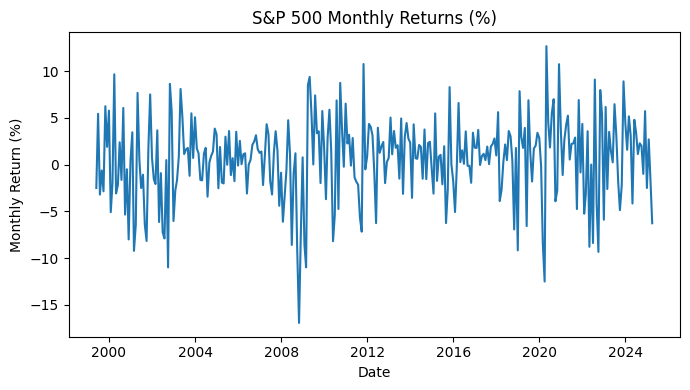

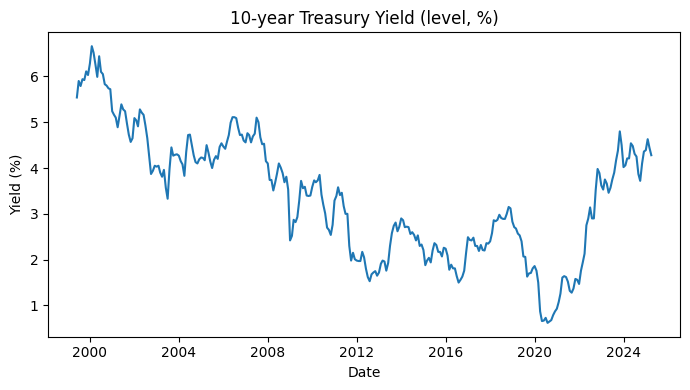

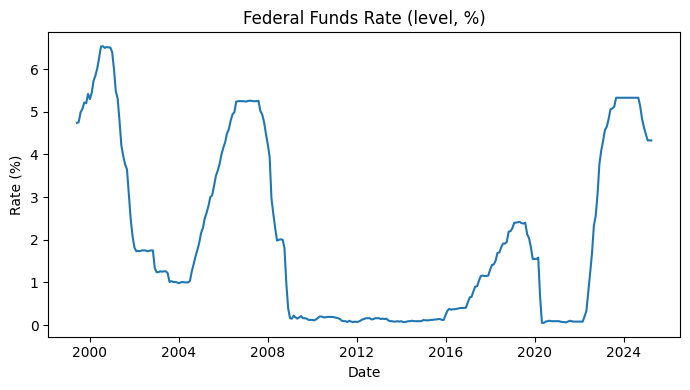

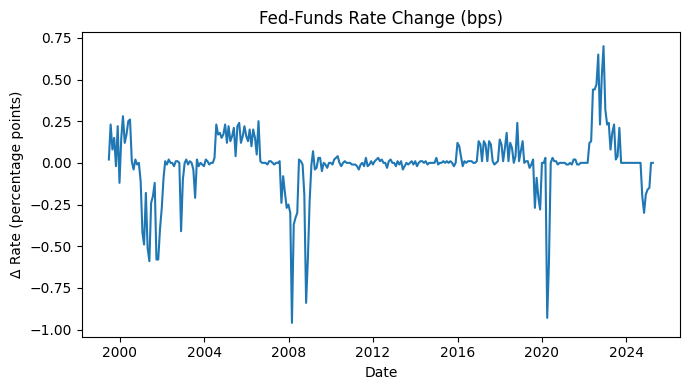

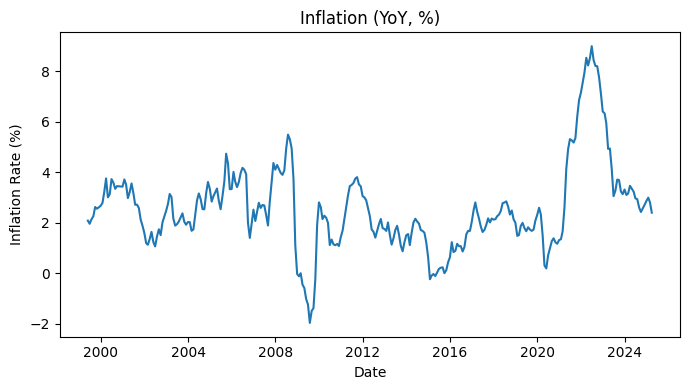

In [26]:
# 6A. Plot each variable over time
plt.figure(figsize=(7, 4))
plt.plot(df_processed.index, df_processed['SP500_Returns'])
plt.title("S&P 500 Monthly Returns (%)")
plt.xlabel("Date"); plt.ylabel("Monthly Return (%)")
plt.tight_layout(); plt.show()

plt.figure(figsize=(7, 4))
plt.plot(df_processed.index, df_processed['GS10_Level'])
plt.title("10‑year Treasury Yield (level, %)")
plt.xlabel("Date"); plt.ylabel("Yield (%)")
plt.tight_layout(); plt.show()

plt.figure(figsize=(7, 4))
plt.plot(df_processed.index, df_processed['FEDFUNDS_Level'])
plt.title("Federal Funds Rate (level, %)")
plt.xlabel("Date"); plt.ylabel("Rate (%)")
plt.tight_layout(); plt.show()

plt.figure(figsize=(7, 4))
plt.plot(df_processed.index, df_processed['FEDFUNDS_BpsChange'])
plt.title("Fed‑Funds Rate Change (bps)")
plt.xlabel("Date"); plt.ylabel("Δ Rate (percentage points)")
plt.tight_layout(); plt.show()

plt.figure(figsize=(7, 4))
plt.plot(df_processed.index, df_processed['Inflation_YoY'])
plt.title("Inflation (YoY, %)")
plt.xlabel("Date"); plt.ylabel("Inflation Rate (%)")
plt.tight_layout(); plt.show()

### Distribution Plots

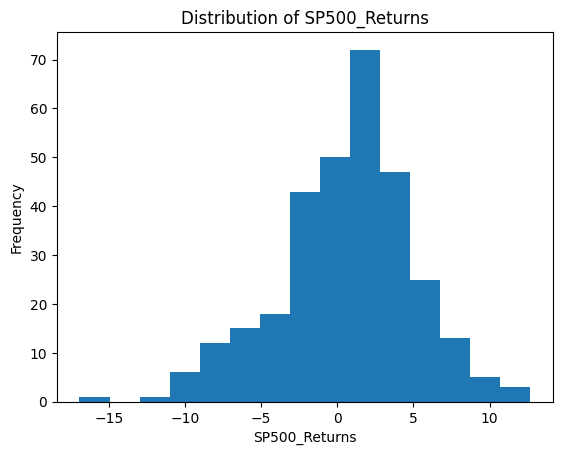

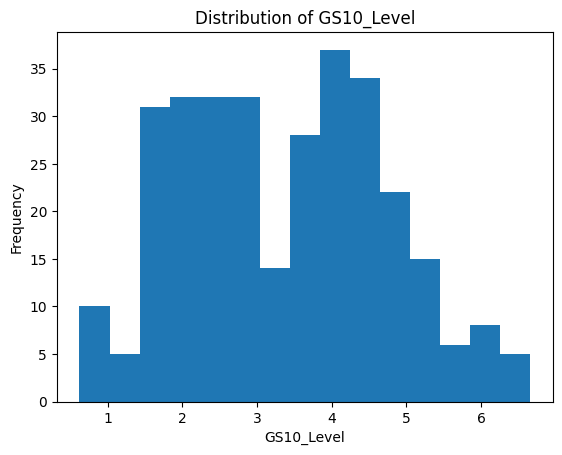

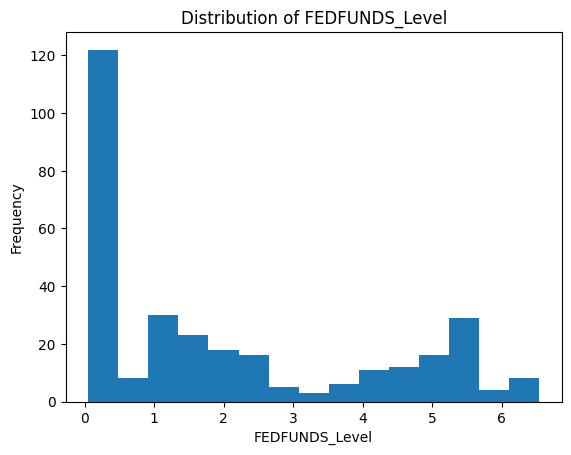

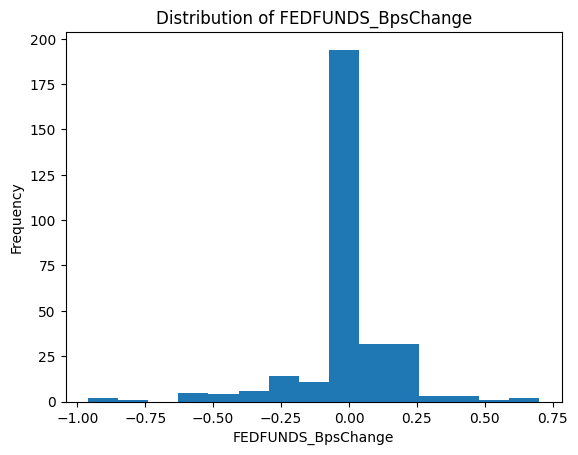

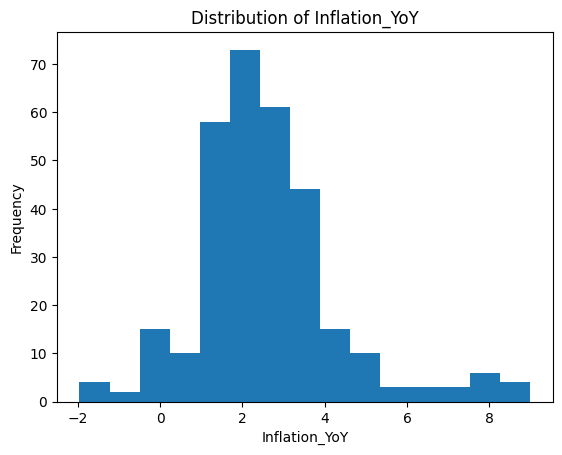

In [27]:
variables = ['SP500_Returns',
             'GS10_Level',
             'FEDFUNDS_Level',
             'FEDFUNDS_BpsChange',
             'Inflation_YoY']

for var in variables:
    plt.figure()
    plt.hist(df_processed[var].dropna(), bins=15)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var); plt.ylabel("Frequency")
    plt.show()

In [28]:
df_processed = df_processed.dropna()

In [29]:
df_processed.to_csv('final_processed_data.csv')